<a href="https://colab.research.google.com/github/Dhanya-Zac/Logistic-Regression/blob/main/Logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression of Iris Dataset**

**For what type of data we use logistic regression for ?**


Logistic regression is commonly used for binary classification tasks, where the target variable has two possible outcomes or classes. That is the answer we want to know is  

*  a yes or no,
*  predicting whether a patient has a disease or not,
*  whether a customer will respond positively to a marketing campaign or not,
*  identifying fraud transactions etc.





In [ ]:
#Scikit-learn library provides a wide range of machine learning algorithms and  tools
from sklearn.linear_model import LogisticRegression

**What are we doing here ?**

Predicting the species of an iris flower based on its sepal length and width(input features X).

In [ ]:
#Import accuracy_score :used to evaluate the performance of the model.
from sklearn.metrics import accuracy_score

In [ ]:
#Import numpy: library for numerical computing
import numpy as np

In [ ]:
#Import pyplot from matplotlib : for creating visualizations
import matplotlib.pyplot as plt

**What is Iris dataset ?**

The Iris dataset contains measurements of various attributes of iris flowers in species Setosa, Versicolor, or Virginica, such as sepal length, sepal width, petal length, and petal width. Each row in the dataset corresponds to a iris flower.The target variable Y is the species of the flower, which can be one of three classes: Setosa, Versicolor, or Virginica.

In [ ]:
#Import datasets from sklearn
from sklearn import datasets

In [ ]:
#load iris dataset
iris = datasets.load_iris()



We need to set input features X and the target variable Y (here: species column) inorder to do logistic regression between them. We are trying to predict the species, so set the variable you want to predict here as Y.

In [ ]:
#Get the sepal length and sepal width
X=iris.data[:, :2]
#Get the target
Y=iris.target
#Here 2 covariatesor input features are used, sepal length X0 and sepal width X1.

#Select sepal length values as X0
X0 = X[:, 0]
#Select sepal width values as X1
X1 = X[:, 1]

**What is decision boundary ?**

The decision boundary in classification tasks, represents the dividing line (or surface) between different classes in the feature space.

For example: if a new iris flower has a sepal length and width that falls on one side of the decision boundary, it will be classified as one class; if it falls on the other side, it will be classified as another class.

In [ ]:
#meshgrid, used for plotting decision boundaries of x and y by generating 2 arrays, xx and yy.
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
  return xx, yy

In [ ]:
#Function call to get Axes values
xx, yy = make_meshgrid(X0, X1)

**Visualizes the logistic regression model's decision boundary**

First, creates a logistic regression model and trains it on the Iris dataset features (X) and target labels (Y)

In [ ]:
model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, Y)



**How logistic regression model predicts ?**

Logistic regression predicts the probability that an instance belongs to a particular class by first calculating  weighted sum of the input features, where each feature is multiplied by a corresponding weight (also known as coefficients).

Then the weighted sum is passed through a logistic function (also called the sigmoid function), which transforms the output into a probability between 0 and 1.

Finally, the predicted probability is compared to a threshold (usually 0.5). If the predicted probability is greater than the threshold, the instance is predicted to belong to the positive class; otherwise, it is predicted to belong to the negative class.

For multinomial logistic regression, the process of predicting probabilities for each class is similar to binary logistic regression, but it extends to multiple classes. Here's how it works:


Multinomial logistic regression calculates a score for each class by performing a separate linear regression for each class against all other classes combined. These scores represent the evidence for each class given the input features.

After calculating the scores, multinomial logistic regression applies the softmax function to convert the scores into probabilities. The softmax function normalizes the scores so that they sum up to 1, ensuring that the output represents a valid probability distribution over all classes. The class with the highest probability is chosen as the predicted class for the input instance.

Now pred predicts the labels (species) for each point in the meshgrid.

In [ ]:
#predict the values
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])

Calculating accuracy score

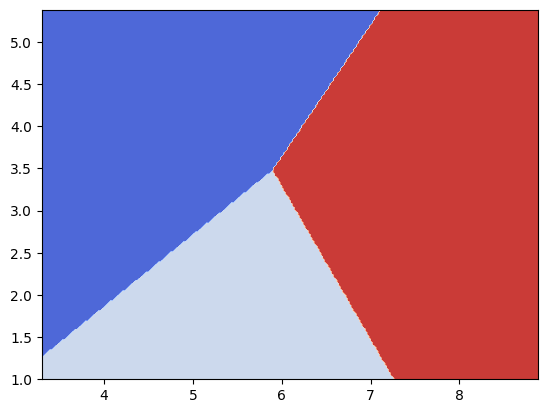

In [ ]:
#Find predicted labels
pred_values = model.predict(np.c_[X0.ravel(), X1.ravel()])
#Find accuracy score
accuracy_value=accuracy_score(Y, pred_values)
#Reshape the data
pred = pred.reshape(xx.shape)
#Draw the classification boundary
plt.contourf(xx, yy, pred, cmap=plt.cm.coolwarm)

The colored regions in the plot represent the decision boundaries generated by the logistic regression model. The range of the x-axis (sepal length) and y-axis (sepal width) in the plot is determined by the minimum and maximum values of these features in the dataset, with an additional margin of 1 unit added to each side. These boundaries divide the feature space into regions where the model predicts different classes. The colors in these regions indicate the predicted class for each point within that region.

Here

*   Blue : Setosa
*   Light blue : Versicolor
*    Red : Virginica




Text(0.5, 1.0, 'Logistic regression')

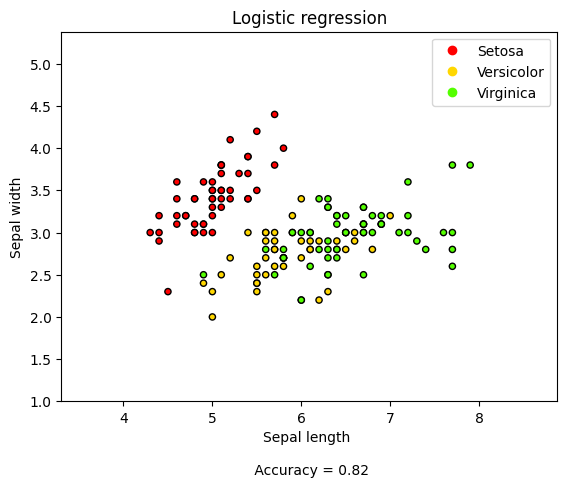

In [ ]:

# Define class labels
class_labels = ['Setosa', 'Versicolor', 'Virginica']

# Plot the scatter plot with labels
scatter = plt.scatter(X0, X1, c=Y, cmap='prism', s=20, edgecolors='k')

# Add legend with class labels
plt.legend(handles=scatter.legend_elements()[0], labels=class_labels, loc='best')


#Set limit for x axis
plt.xlim(xx.min(), xx.max())
#Set limit for y axis
plt.ylim(yy.min(), yy.max())
#Set X label with accuracy score
x_label='Sepal length \n\n Accuracy = '+str("%.2f" % accuracy_value)
#Put label in x axis
plt.xlabel(x_label)
#Put label in y axis
plt.ylabel("Sepal width")
#Set the graph title
plt.title('Logistic regression')

The scatter plot shows the distribution of iris flowers based on their sepal length and width. Each point represents an individual flower, and the color of each point indicates its species (class). For example, points belonging to the same species (e.g., Setosa, Versicolor, Virginica) are shown in the same color.

In [ ]:
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("Number of samples:", iris.data.shape[0])
print("Number of features:", iris.data.shape[1])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Number of samples: 150
Number of features: 4


Descriptive analysis

In [ ]:
import pandas as pd
# Create a DataFrame from the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Class distribution
print("\nClass distribution:")
print(df['target'].value_counts())

# Correlation matrix
print("\nCorrelation matrix:")
print(df.corr())

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%        